In [176]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.simplefilter(action='ignore')

In [177]:
data=pd.read_csv('Skyserver_SQL2_27_2018 6_51_39 PM.csv')


In [178]:
data.sample(5)

,objid,ra,dec,u,g,r,i,z,run,rerun,camcol,field,specobjid,class,redshift,plate,mjd,fiberid
5578,1.237650e+18,141.744295,58.267216,18.99872,18.09226,17.76382,17.63254,17.59964,1345,301,5,221,9.230130e+18,STAR,-0.000715,8198,57374,9
1108,1.237650e+18,189.069786,0.064606,18.06198,18.17445,18.66319,18.97943,19.28476,752,301,4,304,3.287760e+18,STAR,-0.000069,2920,54562,483
7465,1.237650e+18,204.912590,0.172711,19.32435,19.21973,19.06963,18.75994,18.44706,752,301,4,410,3.356930e+17,QSO,2.123821,298,51955,635
4058,1.237650e+18,166.574219,-0.109388,18.09156,17.27404,16.89430,16.61351,16.64506,756,301,3,339,3.118840e+17,GALAXY,0.066825,277,51908,37
1192,1.237650e+18,143.802933,0.649213,18.34674,18.29909,18.49475,18.67688,18.90414,756,301,5,187,4.306820e+18,STAR,-0.000307,3825,55533,930


In [179]:
data.shape

(10000, 18)

In [180]:
data.dtypes

objid        float64
ra           float64
dec          float64
u            float64
g            float64
r            float64
i            float64
z            float64
run            int64
rerun          int64
camcol         int64
field          int64
specobjid    float64
class         object
redshift     float64
plate          int64
mjd            int64
fiberid        int64
dtype: object

In [181]:
data.isnull().sum()

objid        0
ra           0
dec          0
u            0
g            0
r            0
i            0
z            0
run          0
rerun        0
camcol       0
field        0
specobjid    0
class        0
redshift     0
plate        0
mjd          0
fiberid      0
dtype: int64

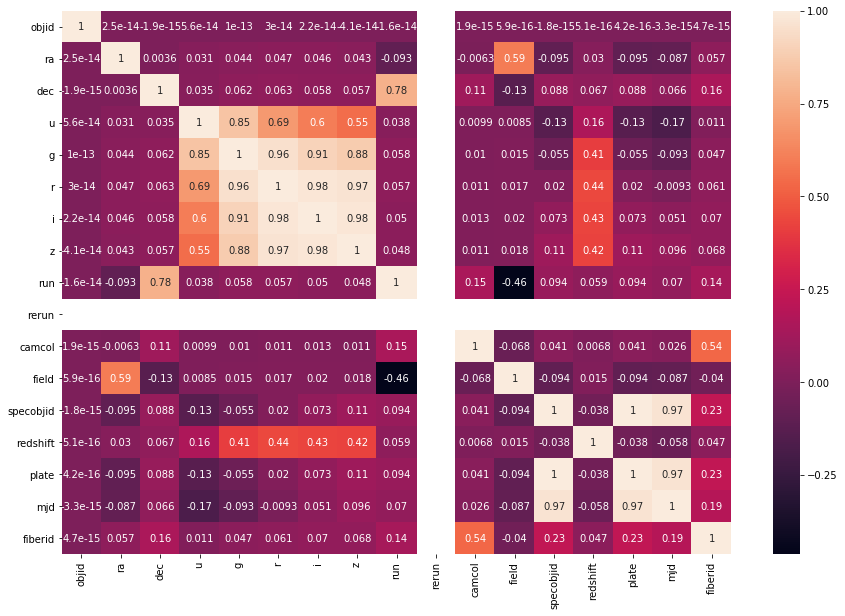

In [182]:
c=data.corr()
plt.figure(figsize = (15,10))
sns.heatmap(c, annot=True)
plt.show()

In [183]:
data=data.drop('rerun', axis=1)

In [184]:
print('Total Number of Instances',data['class'].shape[0])
print("Total number of instances with class 'STAR' ", data[data['class']=='STAR'].shape[0])
print("Total number of instances with class 'GALAXY' ", data[data['class']=='GALAXY'].shape[0])
print("Total number of instances with class 'QSO' ", data[data['class']=='QSO'].shape[0])

Total Number of Instances 10000
Total number of instances with class 'STAR'  4152
Total number of instances with class 'GALAXY'  4998
Total number of instances with class 'QSO'  850


In [185]:
X = data.drop('class',axis=1)
y = data['class']
X.sample(5)

,objid,ra,dec,u,g,r,i,z,run,camcol,field,specobjid,redshift,plate,mjd,fiberid
2378,1.237650e+18,168.731019,-0.615956,19.09632,17.93002,17.40165,17.01023,16.85650,756,2,353,3.141770e+17,0.078283,279,51984,185
6531,1.237650e+18,163.786086,1.137540,17.29264,16.38747,16.11001,15.99290,15.96880,756,6,320,5.327860e+18,0.000408,4732,55648,358
1809,1.237650e+18,170.077098,-1.029505,18.97759,17.54116,16.80317,16.41916,16.13312,756,1,362,3.153220e+17,0.089352,280,51612,254
4641,1.237650e+18,188.217233,64.790292,19.19592,18.08187,17.50370,17.14462,16.96094,1302,3,386,6.755890e+17,0.099386,600,52317,179
6809,1.237650e+18,193.618844,-3.436256,19.56670,17.72849,16.91120,16.50281,16.21707,1140,1,272,3.794410e+17,0.046504,337,51997,47


In [186]:
from sklearn.preprocessing import LabelEncoder
class_encoder=LabelEncoder()
y=class_encoder.fit_transform(y)


In [187]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X= scaler.fit_transform(X)


In [188]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.33, random_state=0)

In [189]:
from sklearn.tree import DecisionTreeClassifier
model= DecisionTreeClassifier(max_depth=3)
model.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [190]:
from sklearn.metrics import accuracy_score
y_predict=model.predict(X_test)

print(accuracy_score(y_predict,y_test))

0.9903030303030304


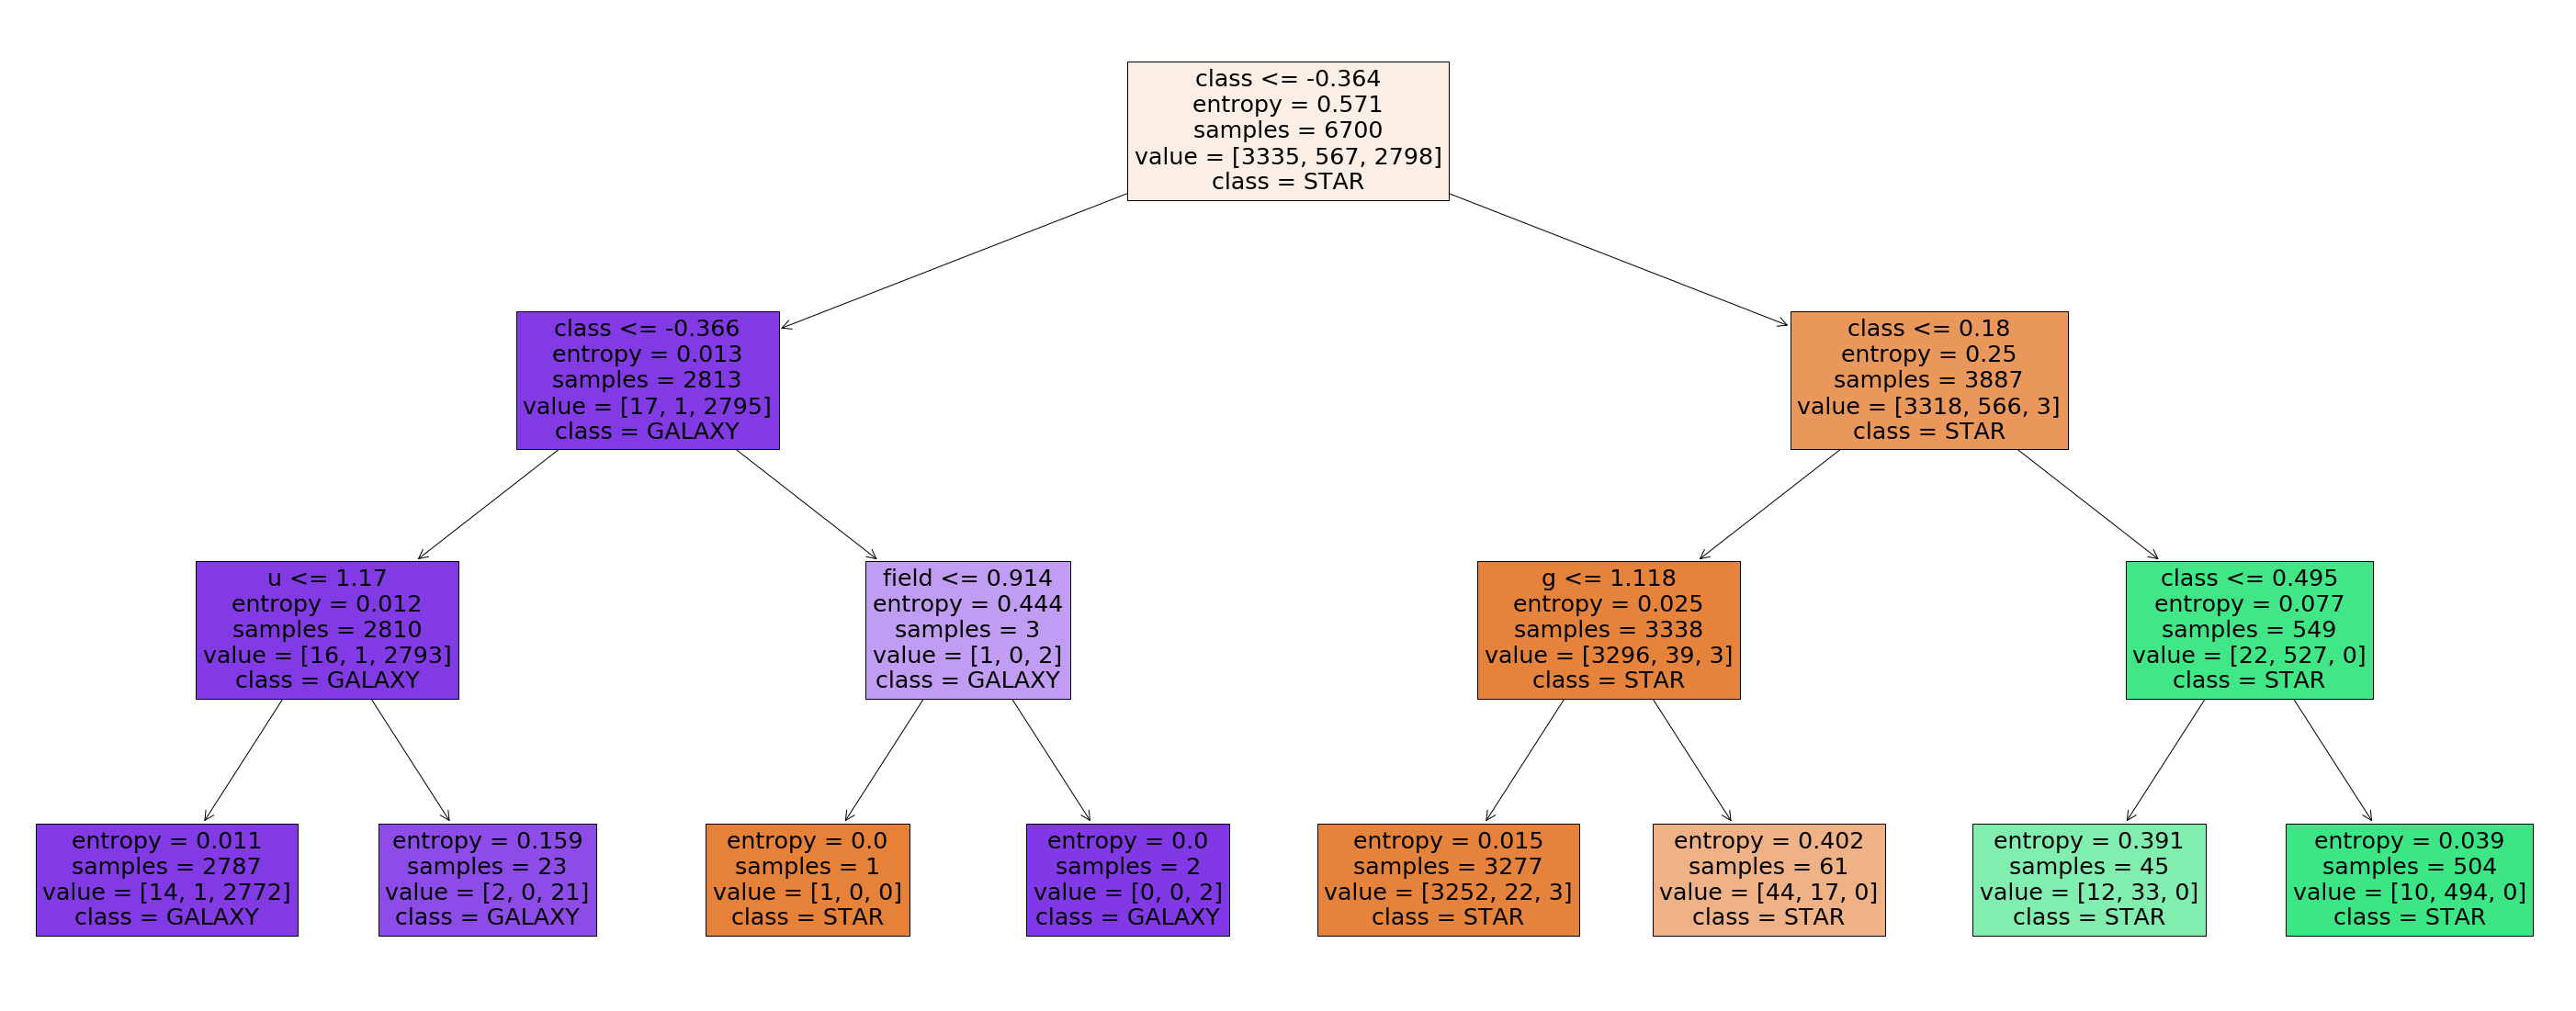

In [175]:
from sklearn import tree
fig = plt.figure(figsize=(50,20))
_ = tree.plot_tree(model, feature_names=data.columns, class_names=data['class'],filled=True)

In [131]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_predict,y_test))

[[1651   19    1]
 [   6  264    0]
 [   6    0 1353]]
